(200, 2) {0, 1}


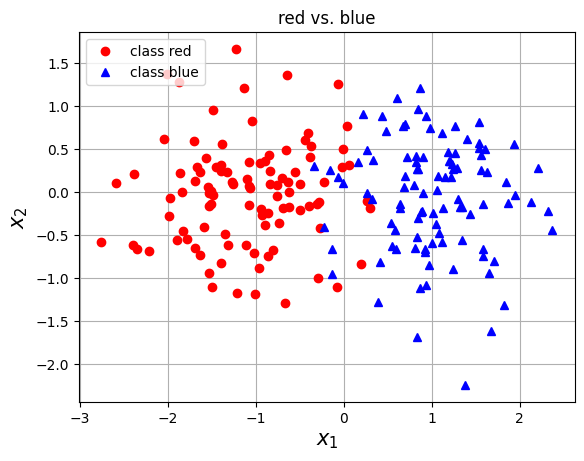

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def sample_binary(s_size) :
    red_mean = [-1,0]
    blue_mean = [1,0]
    std_dev = .6
    x_red = np.random.randn(s_size, 2) * std_dev + red_mean
    x_blue = np.random.randn(s_size, 2) * std_dev + blue_mean
    x = np.vstack((x_red, x_blue))
    y = np.vstack((np.zeros((s_size,1), dtype=np.int64), np.ones((s_size,1), 
dtype=np.int64)))
    return (x,y)

input_data, target = sample_binary(100)
print(input_data.shape, set(target.flatten()))
x_red = input_data[(target==0).flatten()]
x_blue = input_data[(target==1).flatten()]

plt.plot(x_red[:,0], x_red[:,1], 'ro', label = 'class red')
plt.plot(x_blue[:,0], x_blue[:,1], 'b^', label = 'class blue')
plt.grid()
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.title('red vs. blue')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_data, target, random_state = 42, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 2) (40, 2) (160, 1) (40, 1)


In [26]:
def predict(x, w, b):
     return sigmoid(x.dot(w)+b)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def gradient(x, error):
     return x.T.dot(error), np.sum(error)
    
def update(w, b, gd, learning_rate):
     return w-learning_rate*gd[0], b-learning_rate*gd[1]
    
def cost(yp, y):
     return -(np.multiply(y, np.log(yp))+np.multiply((1-y),np.log(1-yp))).mean()


In [28]:
learning_rate = 0.01
epoch = 30
 #초기화
weight = np.zeros((2,1))
bias = 0
train_costs = []
for i in range(epoch):
     pred = predict(X_train, weight, bias)
     epoch_cost = cost(pred, y_train)
     train_costs.append(epoch_cost)
     print(f"cost at epoch {i+1}: {epoch_cost:.4f}")
     gd = gradient(X_train, pred- y_train)
     weight, bias = update(weight, bias, gd, learning_rate)


cost at epoch 1: 0.6931
cost at epoch 2: 0.3761
cost at epoch 3: 0.2945
cost at epoch 4: 0.2553
cost at epoch 5: 0.2314
cost at epoch 6: 0.2151
cost at epoch 7: 0.2031
cost at epoch 8: 0.1938
cost at epoch 9: 0.1864
cost at epoch 10: 0.1803
cost at epoch 11: 0.1752
cost at epoch 12: 0.1709
cost at epoch 13: 0.1671
cost at epoch 14: 0.1639
cost at epoch 15: 0.1610
cost at epoch 16: 0.1584
cost at epoch 17: 0.1561
cost at epoch 18: 0.1541
cost at epoch 19: 0.1522
cost at epoch 20: 0.1505
cost at epoch 21: 0.1489
cost at epoch 22: 0.1475
cost at epoch 23: 0.1462
cost at epoch 24: 0.1450
cost at epoch 25: 0.1438
cost at epoch 26: 0.1428
cost at epoch 27: 0.1418
cost at epoch 28: 0.1409
cost at epoch 29: 0.1400
cost at epoch 30: 0.1392


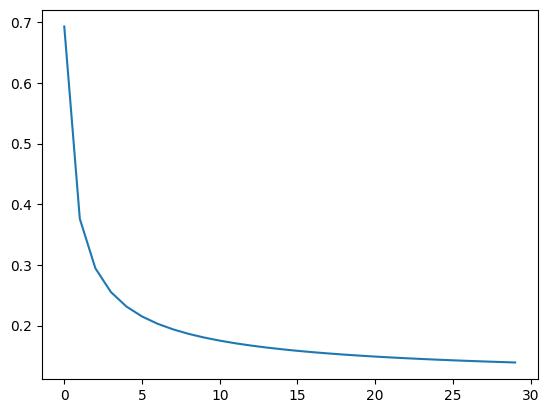

In [29]:
plt.plot(np.arange(len(train_costs)), train_costs)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

train_pred = np.round(predict(X_train, weight, bias))
test_pred = np.round(predict(X_test, weight, bias))
print('Train accuracy:', accuracy_score(train_pred, y_train))
print('Test accuracy:', accuracy_score(test_pred, y_test))
    

Train accuracy: 0.9375
Test accuracy: 0.975
